In [6]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [7]:
# 生成数据集及其标签
def synthetic_data(w, b, num_example):
    X = torch.normal(0, 1, (num_example, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1, 1)


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, lables = synthetic_data(true_w, true_b, 1000)

features: tensor([0.2655, 0.1353]) 
lables: tensor([4.2758])


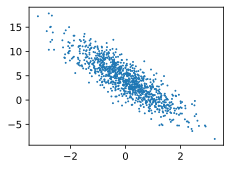

In [8]:
print("features:", features[0], "\nlables:", lables[0])
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), lables.detach().numpy(), 1)

In [ ]:
# 定义一个data_iter函数，该函数接收批量大小、特征向量和标签向量作为输入，生成大小为batch_size的小批量
def data_size(batch_size,features,lables):
    num_example=len(features)
    indices=list(range(num_example))
    #这些样本是随机读取的，没有特定顺序
    random.shuffle(indices)
    
    